# 1. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style(style = 'whitegrid')

# 2. Import Data and Data Understanding
The process proceeds by performing multiple taskIDs for each reception number (caseID) by each resource.

Feature Description: 

1. Categorical Variables:
    - caseID: House repair request reception number.
    - taskID: Task.
    - originator: Task Representative.
    - eventtype: Displays the start and complete of the task.
    - contact: The request channel of the home repair request.
    - RepairType: Repair method.
    - objectKey: The house to be repaired.
    - RepairInternally: Internal repair.
    - RepairCode: Repair type.
    - RepairOK: Repair normally terminated.
    - date: Task performance date.
    - time: Task performance time.

2. Continuous Variables:
    - EstimatedRepairTime: Estimated repair time.

In [3]:
# Read data from csv file to dataframe
repair2 = pd.read_csv('repair2.csv')
repair2.head()

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,419,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/6/2020,11:51
1,561,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/2020,13:48
2,902,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1/8/2020,16:20
3,18,Survey,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/9/2020,6:55
4,852,Survey,Edd,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,1/10/2020,11:33


In [4]:
# A copy of the original dataset
repair2_copy = repair2.copy()

In [5]:
# Check the number of rows and columns
repair2_copy.shape # (13262, 13) 

# => This shows that the dataset comprises of 13262 rows and 13 coulmns

(13262, 13)

In [7]:
# A quick glimpse into the dataset
repair2_copy.info()
# => Data has interger, float and object data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.3+ MB


In [8]:
# create a dataframe contain the number of non nan values in each column, the number of unique value, the number of missing values, and the dtype of each column
test_df = pd.DataFrame({'non_nan': repair2_copy.count(), 'unique': repair2_copy.nunique(), 'missing': repair2_copy.isnull().sum(), 'dtype': repair2_copy.dtypes})

In [9]:
test_df

,non_nan,unique,missing,dtype
caseID,13262,1000,0,int64
taskID,13260,13,2,object
originator,13260,16,2,object
eventtype,13257,2,5,object
contact,1000,4,12262,object
RepairType,927,3,12335,object
objectKey,927,890,12335,float64
RepairInternally,927,2,12335,object
EstimatedRepairTime,927,7,12335,float64
RepairCode,927,4,12335,float64


In [10]:
# Check number of unique values in each column
unique_values = pd.DataFrame(repair2_copy.nunique(), columns=['Unique Values'])
unique_values

,Unique Values
caseID,1000
taskID,13
originator,16
eventtype,2
contact,4
RepairType,3
objectKey,890
RepairInternally,2
EstimatedRepairTime,7
RepairCode,4


In [11]:
# Check missing values
repair2_copy.isnull().sum()
# => Except for caseID, all other variable columns have missing values

caseID                     0
taskID                     2
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
dtype: int64

## 2.1. Frequency Distribution

In [12]:
# COUNTPLOT FUNCTION
def countplot_with_values(data, y):
    plt.figure(figsize=(8,12))
    ax = sns.countplot(data=data, y=y)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+5, p.get_y()+0.5))
    return ax

In [13]:
column_names = repair2_copy.columns
column_names = column_names.drop(['caseID', 'objectKey', 'date', 'time'])
column_names

Index(['taskID', 'originator', 'eventtype', 'contact', 'RepairType',
       'RepairInternally', 'EstimatedRepairTime', 'RepairCode', 'RepairOK'],
      dtype='object')

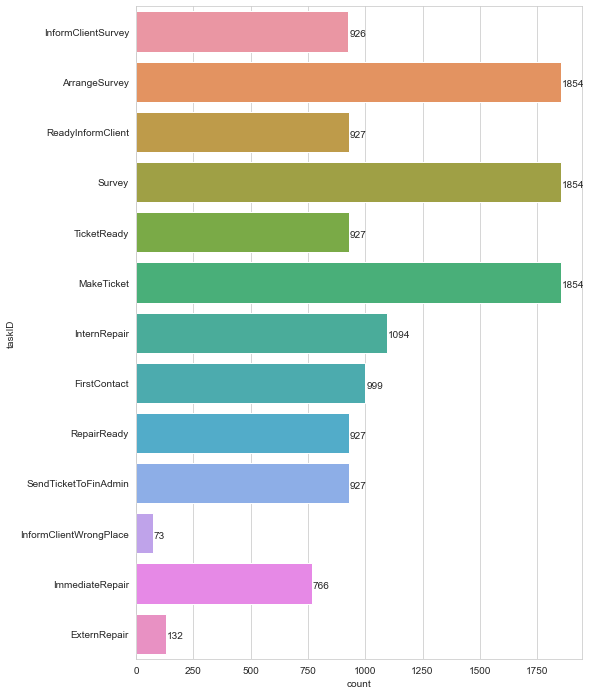

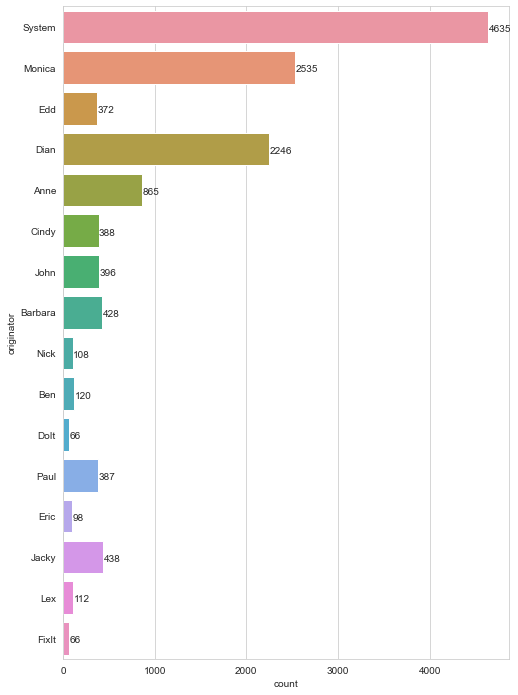

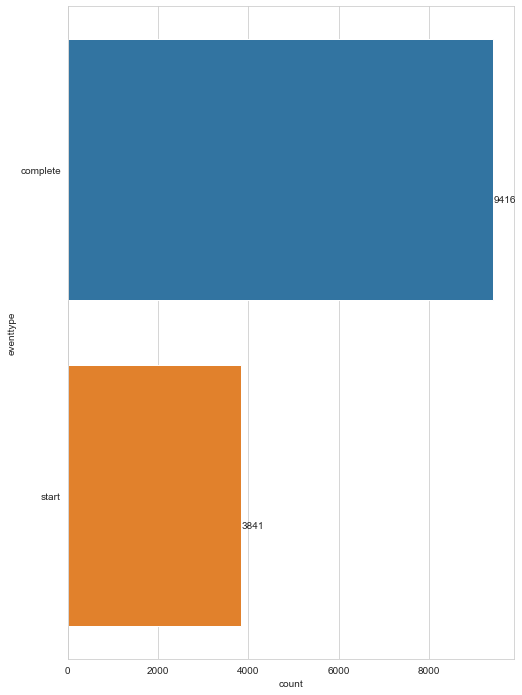

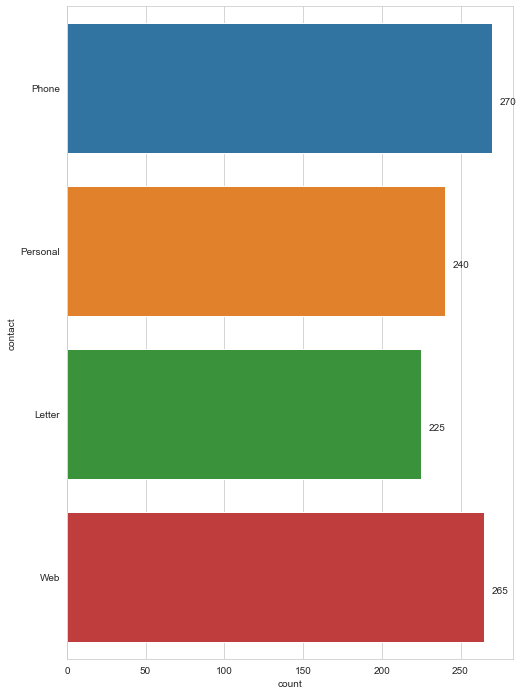

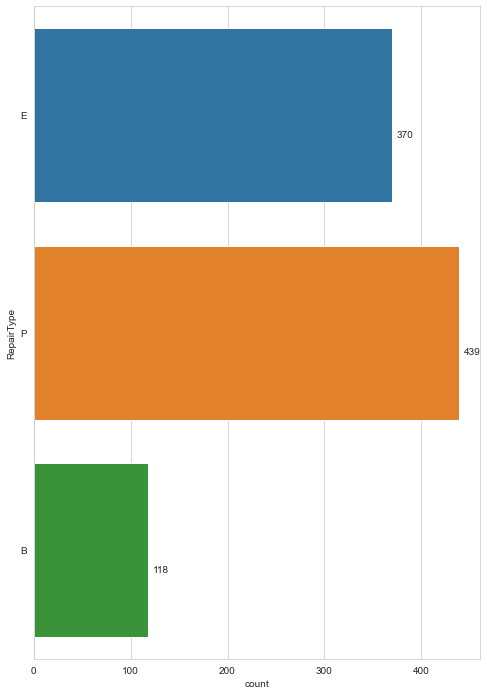

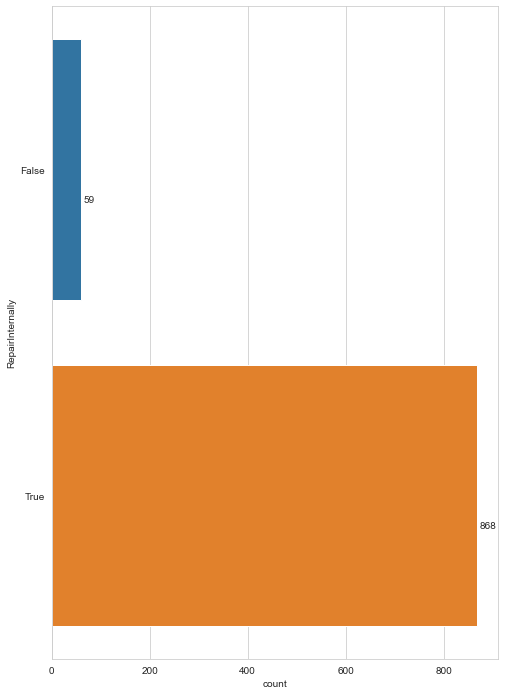

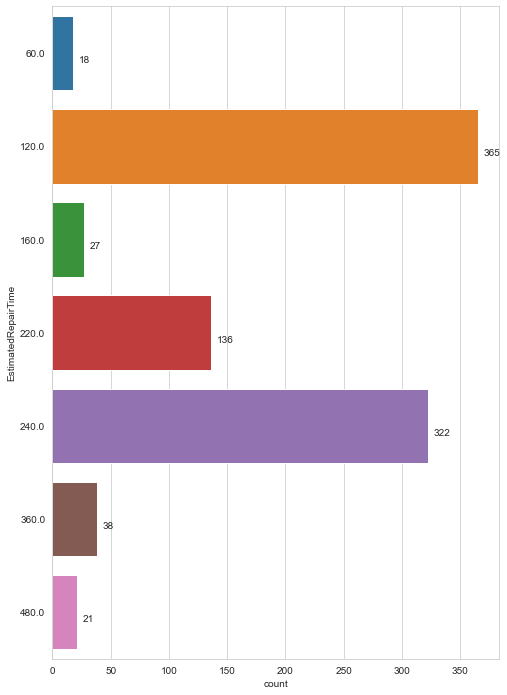

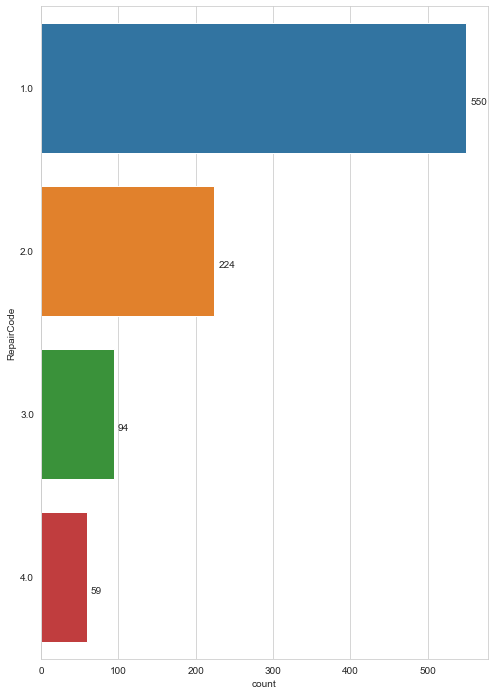

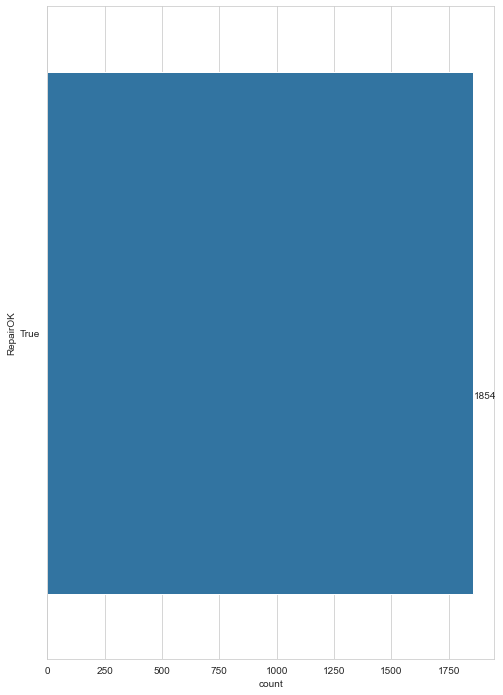

In [14]:
for column_name in column_names:
    countplot_with_values(data = repair2_copy[column_name].reset_index(), y = column_name)

## 2.2. Missing Values, Abnormal Data, Outliers, ...

In [15]:
# !Run only once time

# Create datetime columns from date and time columns then remove date and time columns
repair2_copy['datetime'] = pd.to_datetime(repair2_copy['date'] + ' ' + repair2_copy['time'])
# repair2_copy.drop(['date', 'time'], axis=1, inplace=True)

In [16]:
repair2_copy

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
0,419,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/6/2020,11:51,2020-01-06 11:51:00
1,561,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/2020,13:48,2020-01-07 13:48:00
2,902,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1/8/2020,16:20,2020-01-08 16:20:00
3,18,Survey,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/9/2020,6:55,2020-01-09 06:55:00
4,852,Survey,Edd,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,1/10/2020,11:33,2020-01-10 11:33:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13257,707,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/7/1970,0:16,1970-01-07 00:16:00
13258,25,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/2/1970,7:48,1970-01-02 07:48:00
13259,762,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,11:53,1970-01-03 11:53:00
13260,12,InternRepair,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,18:10,1970-01-08 18:10:00


In [17]:
# Group by caseID
repair2_copy.groupby('caseID').count()

,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
caseID,,,,,,,,,,,,,
1,14,14,14,1,1,1,1,1,1,2,14,14,14
2,15,15,15,1,1,1,1,1,1,2,15,15,15
3,14,14,14,1,1,1,1,1,1,2,14,14,14
4,14,14,14,1,1,1,1,1,1,2,14,14,14
5,14,14,14,1,1,1,1,1,1,2,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,14,14,14,1,1,1,1,1,1,2,14,14,14
997,14,14,14,1,1,1,1,1,1,2,14,14,14
998,14,14,14,1,1,1,1,1,1,2,14,14,14


In [18]:
# access all columns that have caseID equal to 1
caseID = repair2_copy[repair2_copy['caseID'] == 2]

# sort caseID by datetime column
caseID = caseID.sort_values(by='datetime')
caseID


,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
8008,2,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:17,1970-01-08 05:17:00
9321,2,FirstContact,Dian,complete,Personal,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:17,1970-01-08 05:17:00
1073,2,MakeTicket,Dian,complete,NaN,P,8161.0,NaN,NaN,NaN,NaN,1/8/1970,5:21,1970-01-08 05:21:00
2563,2,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:21,1970-01-08 05:21:00
2911,2,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:25,1970-01-08 05:25:00
10505,2,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:25,1970-01-08 05:25:00
11800,2,Survey,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/12/1970,4:19,1970-01-12 04:19:00
3425,2,Survey,Anne,complete,NaN,NaN,NaN,True,120.0,1.0,NaN,1/12/1970,4:57,1970-01-12 04:57:00
5726,2,ImmediateRepair,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/12/1970,4:57,1970-01-12 04:57:00
6279,2,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/12/1970,6:57,1970-01-12 06:57:00


In [19]:
# repair2_copy unique taskID
repair2_copy['taskID'].unique()

array(['InformClientSurvey', 'ArrangeSurvey', 'ReadyInformClient',
       'Survey', 'TicketReady', 'MakeTicket', 'InternRepair',
       'FirstContact', 'RepairReady', 'SendTicketToFinAdmin',
       'InformClientWrongPlace', 'ImmediateRepair', 'ExternRepair', nan],
      dtype=object)

In [20]:
# find all id that have taskID == 'InformClientWrongPlace'
list_wrong_place = repair2_copy[repair2_copy['taskID'] == 'InformClientWrongPlace']['caseID'].unique()

In [21]:
list_wrong_place

array([809, 196, 834, 705, 230, 471, 446, 514,  40, 353, 443, 692, 918,
        13, 766, 145, 201, 397, 780, 697, 578, 105, 835, 571, 942, 631,
       480, 966, 151, 499,   6, 663, 405, 375, 213, 832, 802, 296, 281,
       829, 392, 156, 883, 453, 559,  67, 769, 676, 756, 299, 773, 159,
       706, 718, 842, 531,  61, 223, 774, 784, 723, 465,   7, 312, 747,
       825, 615,  82, 871, 588, 817, 803,  72], dtype=int64)

In [22]:
repair2_copy[repair2_copy['caseID'] == 809].sort_values(by='datetime')

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
2670,809,FirstContact,Dian,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,7:43,1970-01-04 07:43:00
28,809,InformClientWrongPlace,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/3/2020,7:43,2020-02-03 07:43:00


In [23]:
# loop to all caseID of taskID == 'InformClientWrongPlace' and put them in dataframe
InformClientWrongPlace = pd.DataFrame()
for caseID in repair2_copy[repair2_copy['taskID'] == 'InformClientWrongPlace']['caseID'].unique():
    InformClientWrongPlace = InformClientWrongPlace.append(repair2_copy[repair2_copy['caseID'] == caseID])
InformClientWrongPlace

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
28,809,InformClientWrongPlace,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/3/2020,7:43,2020-02-03 07:43:00
2670,809,FirstContact,Dian,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,7:43,1970-01-04 07:43:00
219,196,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/12/2020,11:58,2020-08-12 11:58:00
9942,196,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,11:58,1970-01-03 11:58:00
398,834,InformClientWrongPlace,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/7/2021,1:27,2021-02-07 01:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12480,817,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/6/1970,2:22,1970-01-06 02:22:00
5488,803,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,17:13,1970-01-03 17:13:00
12507,803,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,17:13,1970-01-03 17:13:00
4594,72,FirstContact,Dian,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1/6/1970,19:53,1970-01-06 19:53:00


In [24]:
# groupby InoformClientWrongPlace by caseID
InformClientWrongPlace.groupby('caseID').count()

,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
caseID,,,,,,,,,,,,,
6,2,2,2,1,0,0,0,0,0,0,2,2,2
7,2,2,2,1,0,0,0,0,0,0,2,2,2
13,2,2,2,1,0,0,0,0,0,0,2,2,2
40,2,2,2,1,0,0,0,0,0,0,2,2,2
61,2,2,2,1,0,0,0,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,2,2,2,1,0,0,0,0,0,0,2,2,2
883,2,2,2,1,0,0,0,0,0,0,2,2,2
918,2,2,2,1,0,0,0,0,0,0,2,2,2


In [25]:
# groupby InoformClientWrongPlace by caseID
InformClientWrongPlace.groupby('caseID').count().mean()

taskID                 2.0
originator             2.0
eventtype              2.0
contact                1.0
RepairType             0.0
objectKey              0.0
RepairInternally       0.0
EstimatedRepairTime    0.0
RepairCode             0.0
RepairOK               0.0
date                   2.0
time                   2.0
datetime               2.0
dtype: float64

In [26]:
# find all id that have taskID isnull
repair2_copy[repair2_copy['taskID'].isnull()]['caseID'].unique()

array([245,  15], dtype=int64)

In [27]:
repair2_copy[repair2_copy['caseID'] == 245].sort_values(by='datetime')


,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
7124,245,NaN,Dian,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1/2/1970,14:37,1970-01-02 14:37:00
8027,245,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/2/1970,14:37,1970-01-02 14:37:00
11671,245,MakeTicket,Dian,complete,NaN,E,6776.0,NaN,NaN,NaN,NaN,1/2/1970,14:42,1970-01-02 14:42:00
10310,245,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,2:45,1970-01-03 02:45:00
10803,245,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,2:45,1970-01-03 02:45:00
5237,245,Survey,Paul,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,11:55,1970-01-04 11:55:00
3529,245,InternRepair,Paul,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,12:49,1970-01-04 12:49:00
10972,245,Survey,Paul,complete,NaN,NaN,NaN,True,220.0,2.0,NaN,1/4/1970,12:49,1970-01-04 12:49:00
3440,245,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1/4/1970,16:07,1970-01-04 16:07:00
7013,245,InternRepair,Paul,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,16:07,1970-01-04 16:07:00


In [28]:
repair2_copy['originator'].unique()

array(['System', 'Monica', 'Edd', 'Dian', 'Anne', 'Cindy', 'John',
       'Barbara', 'Nick', 'Ben', 'DoIt', 'Paul', 'Eric', 'Jacky', 'Lex',
       'FixIt', nan], dtype=object)

In [29]:
# # find all id that have originator isnull
repair2_copy[repair2_copy['originator'].isnull()]['caseID'].unique()

array([229, 154], dtype=int64)

In [30]:
repair2_copy[repair2_copy['caseID'] == 2].sort_values(by='datetime')

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
8008,2,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:17,1970-01-08 05:17:00
9321,2,FirstContact,Dian,complete,Personal,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:17,1970-01-08 05:17:00
1073,2,MakeTicket,Dian,complete,NaN,P,8161.0,NaN,NaN,NaN,NaN,1/8/1970,5:21,1970-01-08 05:21:00
2563,2,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:21,1970-01-08 05:21:00
2911,2,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:25,1970-01-08 05:25:00
10505,2,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/8/1970,5:25,1970-01-08 05:25:00
11800,2,Survey,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/12/1970,4:19,1970-01-12 04:19:00
3425,2,Survey,Anne,complete,NaN,NaN,NaN,True,120.0,1.0,NaN,1/12/1970,4:57,1970-01-12 04:57:00
5726,2,ImmediateRepair,Anne,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/12/1970,4:57,1970-01-12 04:57:00
6279,2,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/12/1970,6:57,1970-01-12 06:57:00


In [31]:
# find caseID that have both taskID == 'ImmediateRepair' and taskID == 'ExternRepair'
repair2_copy[(repair2_copy['taskID'] == 'ImmediateRepair') & (repair2_copy['taskID'] == 'ExternRepair')]['caseID'].unique()



array([], dtype=int64)

In [32]:
repair2_copy['eventtype'].unique()

array(['complete', 'start', nan], dtype=object)

In [33]:
# # find all id that have eventtype isnull
repair2_copy[repair2_copy['eventtype'].isnull()]['caseID'].unique()

array([ 14, 146, 229, 128, 132], dtype=int64)

In [34]:
repair2_copy[repair2_copy['caseID'] == 14].sort_values(by='datetime')

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
1684,14,MakeTicket,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,0:25,1970-01-04 00:25:00
5975,14,FirstContact,Monica,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,0:25,1970-01-04 00:25:00
6953,14,ArrangeSurvey,Monica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,0:31,1970-01-04 00:31:00
11296,14,MakeTicket,Monica,complete,NaN,P,9117.0,NaN,NaN,NaN,NaN,1/4/1970,0:31,1970-01-04 00:31:00
1280,14,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,0:33,1970-01-04 00:33:00
6954,14,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/4/1970,0:33,1970-01-04 00:33:00
8226,14,Survey,Jacky,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/6/1970,11:54,1970-01-06 11:54:00
1886,14,ImmediateRepair,Jacky,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/6/1970,12:33,1970-01-06 12:33:00
12694,14,Survey,Jacky,complete,NaN,NaN,NaN,True,120.0,1.0,NaN,1/6/1970,12:33,1970-01-06 12:33:00
5275,14,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1/6/1970,14:33,1970-01-06 14:33:00


In [35]:
# # find all id that have date isnull
repair2_copy[repair2_copy['date'].isnull()]['caseID'].unique()

array([992, 113, 129, 100, 119, 123, 180, 146, 116, 154, 101, 106],
      dtype=int64)

In [36]:
repair2_copy[repair2_copy['caseID'] == 992].sort_values(by='datetime')

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,datetime
11301,992,SendTicketToFinAdmin,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5/23/1905,0:00,1905-05-23 00:00:00
4509,992,FirstContact,Dian,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,3:33,1970-01-03 03:33:00
5585,992,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,3:33,1970-01-03 03:33:00
1842,992,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,3:38,1970-01-03 03:38:00
5390,992,MakeTicket,Dian,complete,NaN,B,5896.0,NaN,NaN,NaN,NaN,1/3/1970,3:38,1970-01-03 03:38:00
1934,992,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,7:07,1970-01-03 07:07:00
3014,992,Survey,Lex,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,7:07,1970-01-03 07:07:00
13191,992,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,7:07,1970-01-03 07:07:00
3226,992,ExternRepair,DoIt,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/3/1970,7:51,1970-01-03 07:51:00
12689,992,Survey,Lex,complete,NaN,NaN,NaN,False,480.0,4.0,NaN,1/3/1970,7:51,1970-01-03 07:51:00


In [37]:
# # find all id that have time isnull
repair2_copy[repair2_copy['time'].isnull()]['caseID'].unique()

array([992, 113, 129, 100, 119, 123, 180, 146, 116, 154, 101, 106],
      dtype=int64)

In [38]:
repair2_copy['datetime'] = pd.to_datetime(repair2_copy['datetime'])
date_request = repair2_copy['datetime']

# find the last date and the first date of the data
print('The last date of the data is: ', date_request.max())
print('The first date of the data is: ', date_request.min())

#There are about 1000 requests to repair the house  in the period from 1905-05-23 to 2022-05-14

The last date of the data is:  2022-05-14 04:48:00
The first date of the data is:  1905-05-23 00:00:00


<AxesSubplot:>

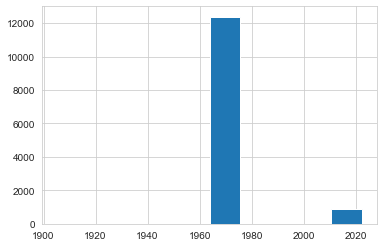

In [39]:
# Plot hist of datetime
repair2_copy['datetime'].hist()

## 2.3. Test the relationship between EstimatedRepairTime and others


In [40]:
list_unique_case_id = repair2_copy['caseID'].unique()

In [41]:
dict_all_caseID = {}

list_columns = ['contact', 'RepairType', 'objectKey', 'RepairInternally', 'EstimatedRepairTime', 'RepairCode']

for case_id in list_unique_case_id:
    if case_id in list_wrong_place:
        continue
    dict_all_caseID[case_id] = {}
    for column in list_columns:
        # find the first non nan value in column
        dict_all_caseID[case_id][column] = repair2_copy.loc[repair2_copy['caseID'] == case_id, column].dropna().tolist()[0]

In [42]:
df_all_caseID = pd.DataFrame.from_dict(dict_all_caseID, orient='index')

In [43]:
df_all_caseID

,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode
419,Phone,P,4689.0,True,120.0,1.0
561,Phone,P,3095.0,True,120.0,1.0
902,Web,P,6093.0,True,120.0,1.0
18,Phone,E,9679.0,True,240.0,1.0
852,Phone,E,4508.0,True,240.0,1.0
...,...,...,...,...,...,...
703,Web,E,2591.0,True,240.0,1.0
474,Personal,E,5563.0,True,240.0,1.0
833,Phone,E,8638.0,True,240.0,1.0
301,Letter,E,9121.0,True,220.0,2.0


### With contact

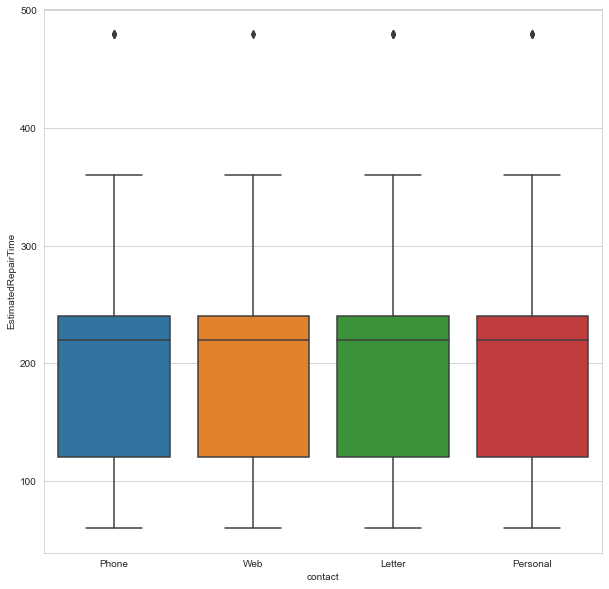

In [44]:
# contact
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='contact', y='EstimatedRepairTime', data=df_all_caseID)
plt.show()

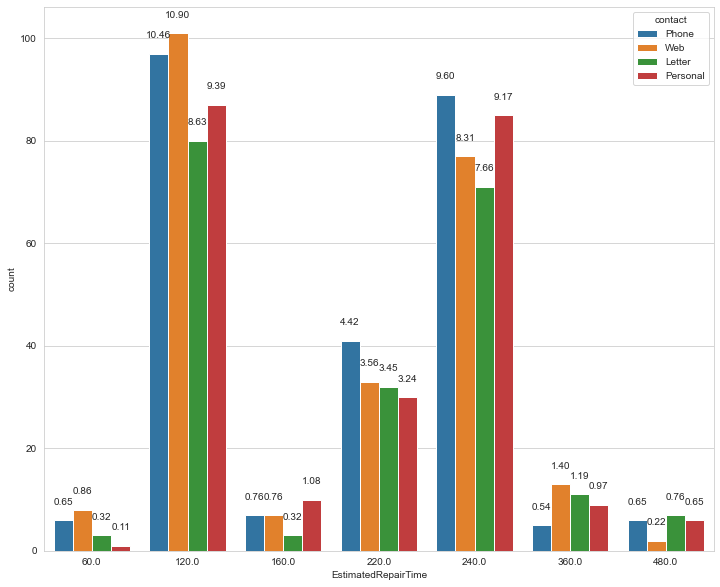

In [45]:
plt.figure(figsize=(12,10))
total = float(len(df_all_caseID["contact"]) )

ax = sns.countplot(x="EstimatedRepairTime", hue="contact", data=df_all_caseID)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [46]:
df_all_caseID[['contact', 'EstimatedRepairTime']].groupby(['contact'], as_index=False).mean().sort_values(by='EstimatedRepairTime', ascending=False)

,contact,EstimatedRepairTime
0,Letter,201.256039
1,Personal,198.333333
2,Phone,191.952191
3,Web,187.136929


In [47]:
# H0(Null Hypothesis) : There is no relationship between EstimatedRepairTime and contact.
# H1(Alternate Hypothesis) : There is a relationship between EstimatedRepairTime and contact.

In [48]:
# crosstable EstimatedRepairTime and contact
c_t = pd.crosstab(df_all_caseID['EstimatedRepairTime'], df_all_caseID['contact'])
c_t

contact,Letter,Personal,Phone,Web
EstimatedRepairTime,,,,
60.0,3,1,6,8
120.0,80,87,97,101
160.0,3,10,7,7
220.0,32,30,41,33
240.0,71,85,89,77
360.0,11,9,5,13
480.0,7,6,6,2


In [49]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=18
p_value 0.3714669768006978
[[ 4.01941748  4.42718447  4.87378641  4.67961165]
 [81.50485437 89.77346278 98.82955771 94.89212513]
 [ 6.02912621  6.6407767   7.31067961  7.01941748]
 [30.36893204 33.44983819 36.82416397 35.3570658 ]
 [71.90291262 79.197411   87.18662352 83.71305286]
 [ 8.48543689  9.34627832 10.28910464  9.87918015]
 [ 4.68932039  5.16504854  5.68608414  5.45954693]]
probability=0.950, critical=28.869, stat=19.335
Independent (fail to reject H0)


### With RepairType

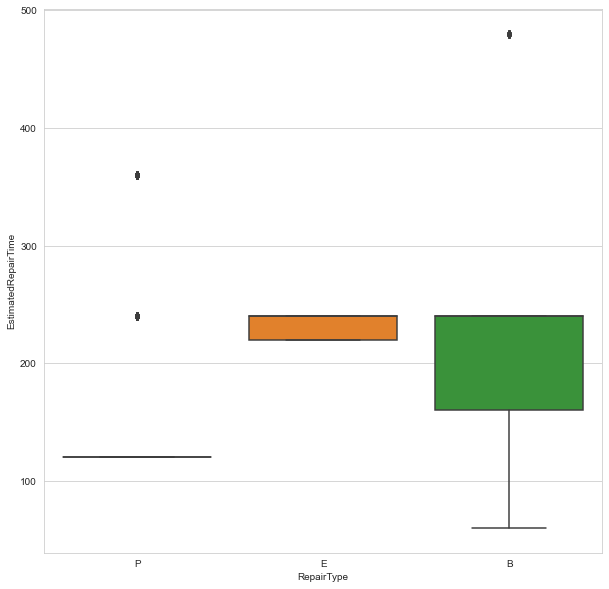

In [50]:
# RepairType
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='RepairType', y='EstimatedRepairTime', data=df_all_caseID)
plt.show()

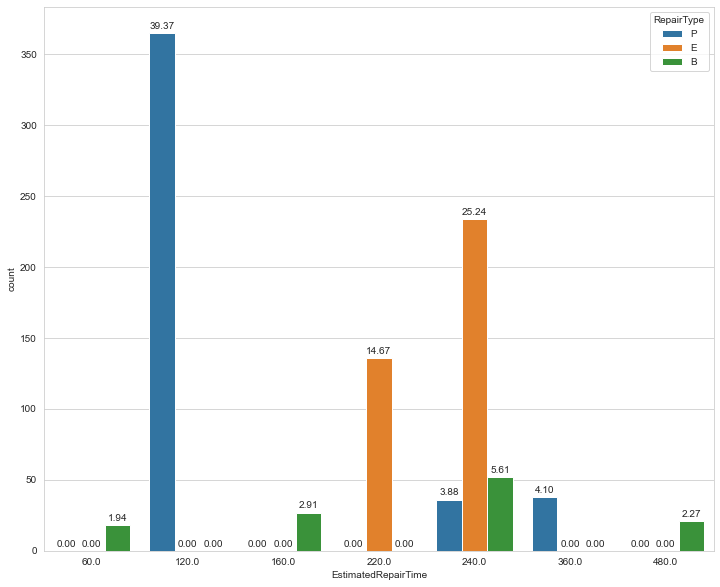

In [51]:
plt.figure(figsize=(12,10))
total = float(len(df_all_caseID["RepairType"]) )

ax = sns.countplot(x="EstimatedRepairTime", hue="RepairType", data=df_all_caseID)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [52]:
df_all_caseID[['RepairType', 'EstimatedRepairTime']].groupby(['RepairType'], as_index=False).mean().sort_values(by='EstimatedRepairTime', ascending=False)

,RepairType,EstimatedRepairTime
0,B,236.949153
1,E,232.648649
2,P,150.615034


In [53]:
a = [0, 1, 2]
a.remove(1)
a

[0, 2]

In [54]:
# H0(Null Hypothesis) : There is no relationship between EstimatedRepairTime and RepairType.
# H1(Alternate Hypothesis) : There is a relationship between EstimatedRepairTime and RepairType.

In [55]:
# crosstable EstimatedRepairTime and contact
c_t = pd.crosstab(df_all_caseID['EstimatedRepairTime'], df_all_caseID['RepairType'])
c_t

RepairType,B,E,P
EstimatedRepairTime,,,
60.0,18,0,0
120.0,0,0,365
160.0,27,0,0
220.0,0,136,0
240.0,52,234,36
360.0,0,0,38
480.0,21,0,0


In [56]:

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=12
p_value 1.6029489378425138e-267
[[  2.29126214   7.18446602   8.52427184]
 [ 46.46170442 145.68500539 172.85329018]
 [  3.4368932   10.77669903  12.78640777]
 [ 17.31175836  54.28263215  64.40560949]
 [ 40.98813376 128.52211435 152.48975189]
 [  4.83710895  15.16720604  17.99568501]
 [  2.67313916   8.38187702   9.94498382]]
probability=0.950, critical=21.026, stat=1283.721
Dependent (reject H0)


### With RepairInternally

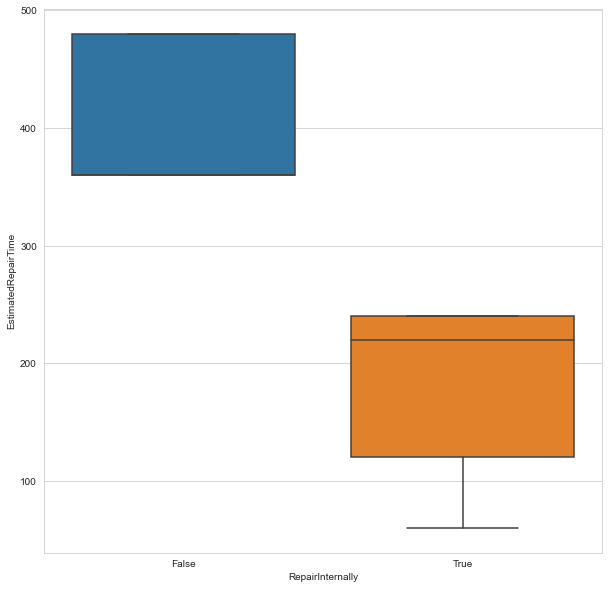

In [57]:
# RepairInternally
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='RepairInternally', y='EstimatedRepairTime', data=df_all_caseID)
plt.show()

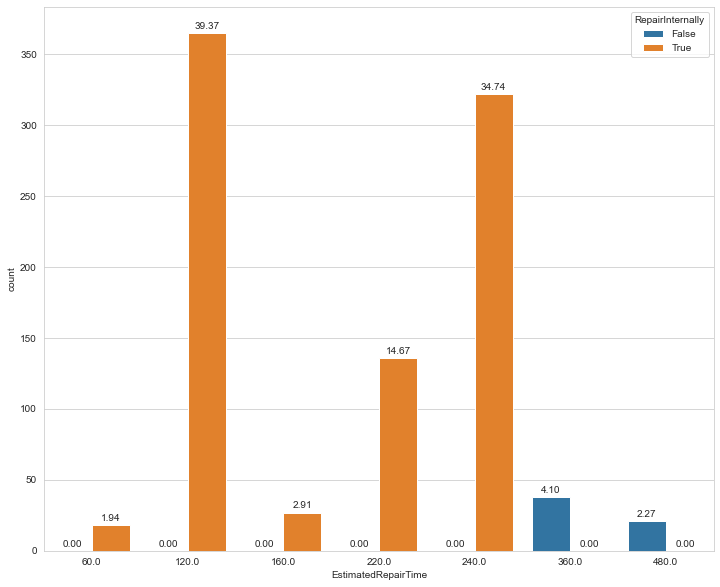

In [58]:
plt.figure(figsize=(12,10))
total = float(len(df_all_caseID["RepairInternally"]) )

ax = sns.countplot(x="EstimatedRepairTime", hue="RepairInternally", data=df_all_caseID)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [59]:
df_all_caseID[['RepairInternally', 'EstimatedRepairTime']].groupby(['RepairInternally'], as_index=False).mean().sort_values(by='EstimatedRepairTime', ascending=False)

,RepairInternally,EstimatedRepairTime
0,False,402.711864
1,True,180.184332


In [60]:
# H0(Null Hypothesis) : There is no relationship between EstimatedRepairTime and RepairInternally.
# H1(Alternate Hypothesis) : There is a relationship between EstimatedRepairTime and RepairInternally.

In [61]:
# crosstable EstimatedRepairTime and contact
c_t = pd.crosstab(df_all_caseID['EstimatedRepairTime'], df_all_caseID['RepairInternally'])
c_t

RepairInternally,False,True
EstimatedRepairTime,,
60.0,0,18
120.0,0,365
160.0,0,27
220.0,0,136
240.0,0,322
360.0,38,0
480.0,21,0


In [62]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=6
p_value 5.463250217273266e-197
[[  1.14563107  16.85436893]
 [ 23.23085221 341.76914779]
 [  1.7184466   25.2815534 ]
 [  8.65587918 127.34412082]
 [ 20.49406688 301.50593312]
 [  2.41855448  35.58144552]
 [  1.33656958  19.66343042]]
probability=0.950, critical=12.592, stat=927.000
Dependent (reject H0)


### With RepairCode

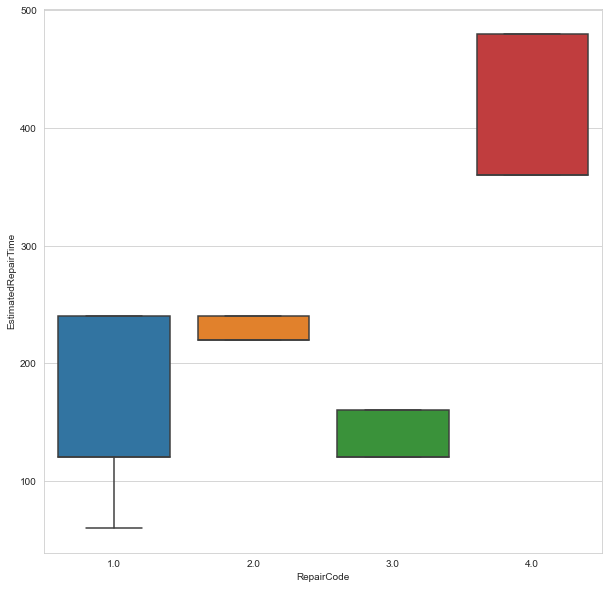

In [63]:
# RepairCode 
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x='RepairCode', y='EstimatedRepairTime', data=df_all_caseID)
plt.show()

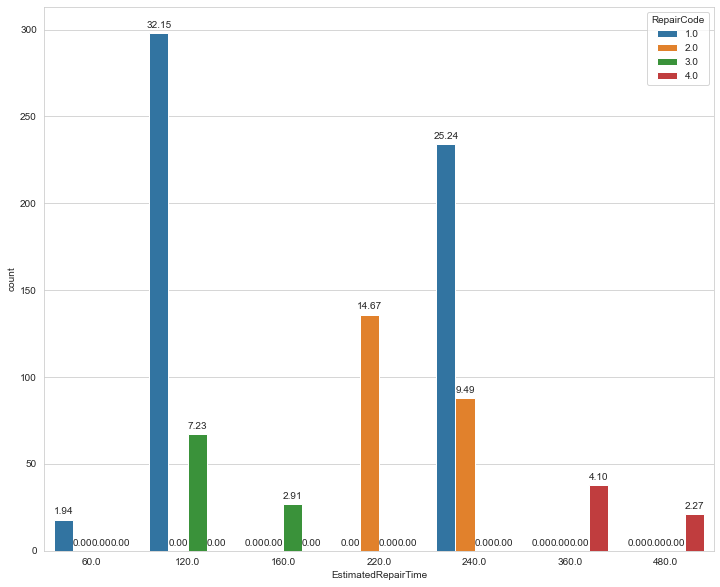

In [64]:
plt.figure(figsize=(12,10))
total = float(len(df_all_caseID["RepairCode"]) )

ax = sns.countplot(x="EstimatedRepairTime", hue="RepairCode", data=df_all_caseID)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [65]:
df_all_caseID[['RepairCode', 'EstimatedRepairTime']].groupby(['RepairCode'], as_index=False).mean().sort_values(by='EstimatedRepairTime', ascending=False)

,RepairCode,EstimatedRepairTime
3,4.0,402.711864
1,2.0,227.857143
0,1.0,169.090909
2,3.0,131.489362


In [66]:
# H0(Null Hypothesis) : There is no relationship between EstimatedRepairTime and RepairCode.
# H1(Alternate Hypothesis) : There is a relationship between EstimatedRepairTime and RepairCode.

In [67]:
# crosstable EstimatedRepairTime and contact
c_t = pd.crosstab(df_all_caseID['EstimatedRepairTime'], df_all_caseID['RepairCode'])
c_t

RepairCode,1.0,2.0,3.0,4.0
EstimatedRepairTime,,,,
60.0,18,0,0,0
120.0,298,0,67,0
160.0,0,0,27,0
220.0,0,136,0,0
240.0,234,88,0,0
360.0,0,0,0,38
480.0,0,0,0,21


In [68]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=18
p_value 0.0
[[ 10.67961165   4.34951456   1.82524272   1.14563107]
 [216.5587918   88.19848975  37.01186624  23.23085221]
 [ 16.01941748   6.52427184   2.73786408   1.7184466 ]
 [ 80.69039914  32.86299892  13.79072276   8.65587918]
 [191.04638619  77.80798274  32.65156419  20.49406688]
 [ 22.54584682   9.18230852   3.85329018   2.41855448]
 [ 12.45954693   5.07443366   2.12944984   1.33656958]]
probability=0.950, critical=28.869, stat=1776.918
Dependent (reject H0)
